Lecture 2: Simplifying Surface Transport

In [1]:
import numpy as np
from IPython.core.display import HTML
from matplotlib import pyplot as plt

In [1]:
nb_list = !jupyter notebook list
server = [l for l in nb_list if 'eos423' in l][0].split(' :: ')[0]
prefix = server.split('?')[0]
token = server.split('?')[1]
notebook = 'Lectures02_Transport.ipynb'
url = prefix+'notebooks/'+notebook+'?'+token
!decktape -s '1920x1080' rise $url pdf_slides/Lectures02_Transport.pdf

Loading page http://localhost:8889/notebooks/Lectures02_Transport.ipynb?token=8df3e7adb0826f4370f5d8b1438d111ea1517dfde7fdde66 ...
actions jupyter-notebook:find-and-replace does not exist, still binding it in case it will be defined later...
load_extensions {
  '0': 'nbextensions_configurator/config_menu/main',
  '1': 'contrib_nbextensions_help_item/main',
  '2': 'rise/main',
  '3': 'jupyter-js-widgets/extension',
  '4': 'jupyter-black-master/jupyter-black',
  '5': 'toc2/main',
  '6': 'hide_code/hide_code',
  '7': 'hide_input/main',
  '8': 'codefolding/main',
  '9': 'splitcell/splitcell'
}
Loaded moment locale en-gb
Failed to load resource: the server responded with a status of 404 (Not Found)
HTML Sanitizer div.style changed {
  change: 'changed',
  tagName: 'div',
  attribName: 'style',
  oldValue: 'display:flex;height:60vh',
  newValue: 'display: flex ; height: 60vh'
}
HTML Sanitizer div.style changed {
  change: 'changed',
  tagName: 'div',
  attribName: 'style',
  oldValue: 'visib

Session: kernel_created (01c1e114-dd00-497d-802e-4922b05a1920)
Starting WebSockets: ws://localhost:8889/api/kernels/27b057a9-de76-4598-b69a-5d3c7329b64b
Failed to load extension: [ 'nbextensions/hide_code/hide_code' ] {
  requireType: 'scripterror',
  requireModules: [ 'nbextensions/hide_code/hide_code' ],
  originalError: { isTrusted: true }
}
Loading extension: nbextensions_configurator/config_menu/main
Loading extension: contrib_nbextensions_help_item/main
Loading extension: rise/main
Loading extension: hide_input/main
Loading extension: splitcell/splitcell
center
center
Kernel: kernel_connected (27b057a9-de76-4598-b69a-5d3c7329b64b)
Loading extension: jupyter-js-widgets/extension
Failed to load resource: the server responded with a status of 404 (Not Found)
Widgets are not available.  Please install widgetsnbextension or ipywidgets 4.0
Loading extension: jupyter-black-master/jupyter-black
Loading extension: toc2/main
[toc2] Notebook fully loaded -- toc2 initialized 
Loading extensi

# Lecture 2: Simplifying Surface Transport  

<div data-id="columns" style="display:flex;height:60vh">
<div class="clearpanel_start" style="visibility: visible;font-size:.9em">
<ol>
<li>Motivation: the stratigraphic record<ul>
<li>An example</li>
<li>Modeling basin fill</li>
</ul>
</li>
<li>What is diffusion?<ul>
<li>Numerical example</li>
<li>Diffusive flux: what is it in <em>words</em> and <em>math</em></li>
<li>Continuity equation: what is it in <em>words</em> and <em>math</em></li>
<li>Diffusion as a transport mechanism</li>
</ul>
</li>
<li>Assignment 1: diffusive transport</li>
</ol>
</div>
<div class="clearpanel" style="visibility: visible;">
<center><img src='images/wus2.jpg'style='height:55vh;display:block; margin:auto'/></center><br>
</div>
</div>

<div style='font-size:25px'> <i>We acknowledge and respect the lək̓ʷəŋən peoples on whose traditional territory the university stands and the Songhees, Esquimalt and W̱SÁNE&#262; peoples whose historical relationships with the land continue to this day.</i></div>

Po River (Italy)

<div style='height:50vh'><center>
<img src="images/po_river_delta2.png" style="height:50vh">
</center></div>

<center><span style='color:dodgerblue'>What do you see? Are there any patterns or features that stand out?</span></center>

Po River (Italy)

<div data-id="columns" style="display:flex;height:70vh">
<div class="clearpanel_start" style="visibility: visible;">
<p>Class observations/interpretations</p>
<ul>
<li style='visibility:visible'>topsets (flat lying reflectors behind foresets) seem to indicate local sea level rise</li>
<li style='visibility:visibe'>foresets prograde (move into the basin) and maybe increase a little bit in elevation</li>
</ul>
</div>
<div class="clearpanel" style="visibility: visible;">
<div style='height:70vh'><center>
<img src="images/po_river_delta2.png" style="height:20vh">
</center></div>
</div>
</div>

## Simulating basin fill
*Forward* models can be used to explore some of these complex interactions. Generally there are two types of numerical models:  
- complex fluid-flow models [(think about the complexity of coastal dynamics)](https://earthengine.google.com/timelapse#v=23.47002,-75.69627,11.322,latLng&t=0.45&ps=50&bt=19840101&et=20181231&startDwell=0&endDwell=0)
   - use very real physical equations to simulate movement in 3-D of each grain
   - need accurate and high resolution data
   - computationally expensive
   - challenging to learn from or compare to stratigraphic data

- empirical transport models 
    - approximate transport laws combined with conservation equations (**diffusion**)
    - does not mimic in detail each geologic process
    - computationally inexpensive
    - model outputs can be easily compared to real data

# What is diffusion?
Lets take a look at some examples of diffusion..

A working definition of diffusion: <span style='color:DodgerBlue;font-weight:800'>*is the net movement of anything (for example, atom, sediments, energy) from a region of higher concentration to a region of lower concentration*.</span>

<center>
    <div style='height:40vh;'>
	    <img src="images/particle.gif" style='height:40vh'>
    </div>
</center>

Note that it is the complex interaction of particles above that causes diffusion, not some inherent desire to randomly move.

In Chemistry, Diffusion describes the process where **entropy** is increased as concentration gradients (chemical potential) are erased. <span style='font-weight:bold;color:dodgerblue'>How might diffusion be useful to describing sedimentary transport?</span>

Diffusion is a good predictor of the **net effect** many transport related processes such as tidal currents, storms, bioturbation, the growth and death of reefs, etc. 
- acts to decrease topographic gradients (gravitational potential energy)
- useful for building intuition about the stratigraphic record

The key here is that we can estimate the net change without understanding the details of every interaction.

## Numerical example
If diffusion is the result of complex interactions, we can simulate those processes with random motion, and explore the system with a simple script. First, let's create a 2D world of 0's and 1's and introduce random motion.

Import some tools

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [5]:
row=[True]*10+[False]*10
row=[row]*1000
row=np.array(row)
print(row)
new_row = np.copy(row)


[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


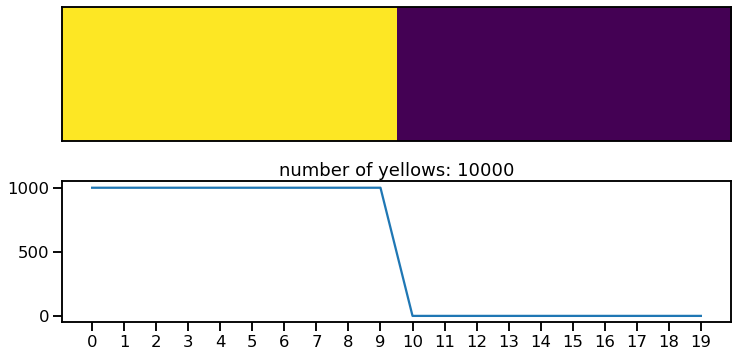

In [6]:
fig=plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.imshow(row,interpolation='nearest')
plt.gca().set_aspect(1/250)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(2,1,2)
plt.plot(np.arange(20),np.sum(row,axis=0))
plt.gca().set_xticks(np.arange(20))
plt.gca().set_title('number of yellows: %2.0f' % (np.sum(row)))
plt.gca().set_aspect(1/250)


Introduce *random* motion

In [7]:
for n in range(10):
    row=np.copy(new_row)
    for i in range(1,1000-1): 
        for j in range(1,20-1):
            change_x = np.random.choice([-1,0,1])
            change_y = np.random.choice([-1,0,1])
            new_row[i,j] = row[i+change_x,j+change_y]
            

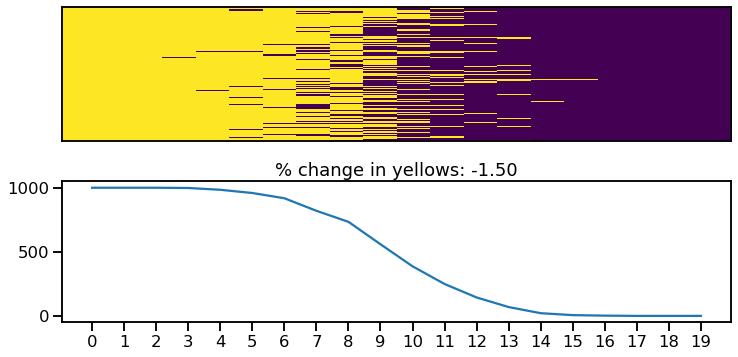

In [8]:
def make_fig(row,show_grad=False):
    fig=plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    plt.imshow(row,interpolation='nearest')
    plt.gca().set_aspect(1/250)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.subplot(2,1,2)
    plt.plot(np.arange(20),np.sum(row,axis=0)) 
    plt.gca().set_xticks(np.arange(20))
    plt.gca().set_title('%% change in yellows: %2.2f' % (100*np.sum(row)/10000-100))
    plt.gca().set_aspect(1/250)
    if show_grad:
        plt.gca().twinx().plot(np.arange(1,21),np.gradient(np.sum(row,axis=0)),color='r',label='gradient')
        plt.gca().legend(loc='best')

make_fig(row)

In [5]:
dt = .01
total_time = 2000
base_level_rise=5

model = Diffuse1D(length=10000, spacing=10, tstep=dt, left=10, right=-200, K=1e2)
xt = np.linspace(0, 10000, 10000)

model.set_baselevel(xt, -10 * np.sin(xt * 3e-2) + base_level_rise / (total_time) * xt - 25)

beds = []
otime = []
rsl = []
# plt.plot(model.u)

beds.append(model.u)
otime.append(model.time)
rsl.append(model.base_level)


pbar = tqdm(range(int(total_time / dt)+1))
for k in pbar:
    model.run_step()
    #     model.set_left(model.base_level+10)
    if k % 2000 == 0:
        pbar.set_description("Processing year %s" % np.round(model.time, 1))
        beds.append(model.u)
        otime.append(model.time)
        rsl.append(model.base_level)

So how do we describe the change in the amount of yellow?

flux of material to the right

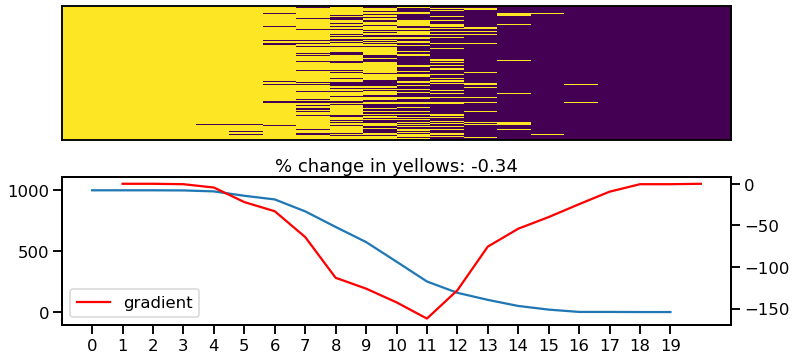

In [8]:
make_fig(row,show_grad=True) 

<span style="color:green;font-weight: bold">where is the diffusive flux largest?</span>

- Flux is largest where the gradient is largest (they are proportional)

## Diffusive flux: what is it in *words*
Lets consider a property, $u$, that is distributed over some spatial grid, $x$. We are interested in what happens to $u$ when we introduce random transport (**diffusion**).
- Diffusion occurs when a (1) conservative property ($u$, like mass, energy, momentum) moves through space (2) <span style="color:blue"> at a rate </span>  <span style="color:red"> proportional to a gradient </span>

Let's go through **number 2** first:

- <span style="color:blue"> [tranportation rate of $u$] </span> is proportional to [<span style="color:red"> change in amount of $u$ over some distance </span>]

- <span style="color:blue"> [the flux $Q_u$] </span> is proportional to [<span style="color:red"> the spatial gradient of $u$</span>]

## Diffusive flux: what it is in *math*
The diffusive flux, <span style="color:blue"> $Q_u$ </span> is proportional to the <span style="color:red"> spatial gradient of $u$ </span>: 

$$\begin{equation}
\color{blue}{ Q_u}	\propto \color{red}{- \dfrac{\Delta u}{\Delta x}}
\end{equation}$$

or introduce a *proportionality constant*, $K$, and now talk about *infinitisimal changes* ($\partial$ vs. $\Delta$):

$$\begin{equation}
\color{blue}{Q_u}	= \color{red}{- K \dfrac{\partial u}{\partial x}}
\end{equation}$$

<center>
    <div style='height:12vh;'>
	    <p>
    </div>
</center>
<span style="color:green;font-weight: bold">why is there a negative sign?</span>

- the flux constant is negative to indicate a transfer from regions of higher $u$ values to lower

## Continuity equation: what is it in *words*
- Diffusion occurs when a (1)  <span style="color:blue"> conservative property </span> ($u \rightarrow$ like mass, energy, momentum) <span style="color:red"> moves through space </span> (2) at a rate  proportional to a gradient


- Now, let's tackle **point number one** (mass balance):  
   - <span style="color:blue"> [change in $u$ with time] </span> is equal to [<span style="color:red"> change in transport rate of $u$ with distance </span>]
   - <span style="color:blue"> [rate of change in $u$] </span> is equal to [<span style="color:red"> the flux gradient of $u$</span>]
<center>
    <div style='height:40vh;'>
	    <p>
    </div>
</center>

## Continuity equation: what is it in *math*
This equality is known as the **continuity equation** (conservation of mass/energy/momentum):<br><br>
$$\begin{equation}
\color{blue}{ \dfrac{\Delta u}{\Delta t}} =  \color{red}{- \dfrac{\Delta Q_u}{\Delta x}} = \color{red}{- \dfrac{Q_2 - Q_1}{x_2 - x_1}}
\end{equation}$$

Or in proper mathematical terms:<br>
$$\begin{equation}
\color{blue}{\dfrac{\partial u}{\partial t}}
\color{black}{= }
\color{red}{- \dfrac{\partial Q_u}{\partial x}}
\end{equation}$$
<br>
if Q2 > Q1, then u will:<br>
if Q2 < Q1, then u will:<br>
if Q2 = Q1, then u will:<br>

<span style="color:green;font-weight: bold">How is this equation a conservation of mass?</span>


Lets consider a discrete box model with the following properties, how would we determine the concentration of $u$ in our box at time, $T=1$?   
`Qu=[1,1.5]
X=[0,1]
T=[0,1]
U_0=[1]`  


By combining these two equations, we can show $u$ will change over time as a function of the second spatial derivative of $u$ (*the curvature*):  

| Diffusive flux &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; | Continuity equation |
|:---|---:|
|$Q_u= -K\dfrac{\partial u}{\partial x}$|$\color{blue}{\dfrac{\partial u}{\partial t}} \color{black}{= } \color{red}{- \dfrac{\partial Q_u}{\partial x}}$|



<center></center>
$$\begin{equation}
\color{blue}{\dfrac{\partial u}{\partial t}}
\color{black}{= }
K\color{red}{\dfrac{\partial\left(\color{black}{\dfrac{\partial u}{\partial x}}\right)}{\partial x}}
\color{black}{= }
K \dfrac{\partial^2 u}{\partial x^2}\tag{Diffusion equation}
\end{equation}$$



Applying the diffusion equation to a physical system has two general requirements:
1. transport / transfer is proportional to a gradient
2. conservation of mass or energy
<center>
    <div style='height:30vh;'>
	    <p>
    </div>
</center>

## Diffusion as a transport mechanism
When we assume that **diffusive transport** exerts an important control on landscape dynamics we generally accept that particles on the surface of the planet are in constant complex motion, and there is some **downslope bias introduced by gravity** to those motions. Over time, **diffusion** can be assumed to smooth topography (by the transport of material downslope).
<center></center>
$$\begin{equation}
\dfrac{\partial h}{\partial t}
= 
K \dfrac{\partial^2 h}{\partial x^2}\tag{hillslope application}
\end{equation}$$







<center>
    <div style='height:40vh;'>
	    <p>
    </div>
</center>

<span style='color:Gray'>    **Note: we wouldn't want to use this model to explain transport in rivers, why not?**</span>

# A look ahead
Over the next few weeks in your assignments you will be building a 1-D diffusive transport model to explore how variations in the following properties change the stratigraphic **architecture** of a basin:
1. transport
2. sediment supply
3. accommodation space

# An example: varying accommodation space

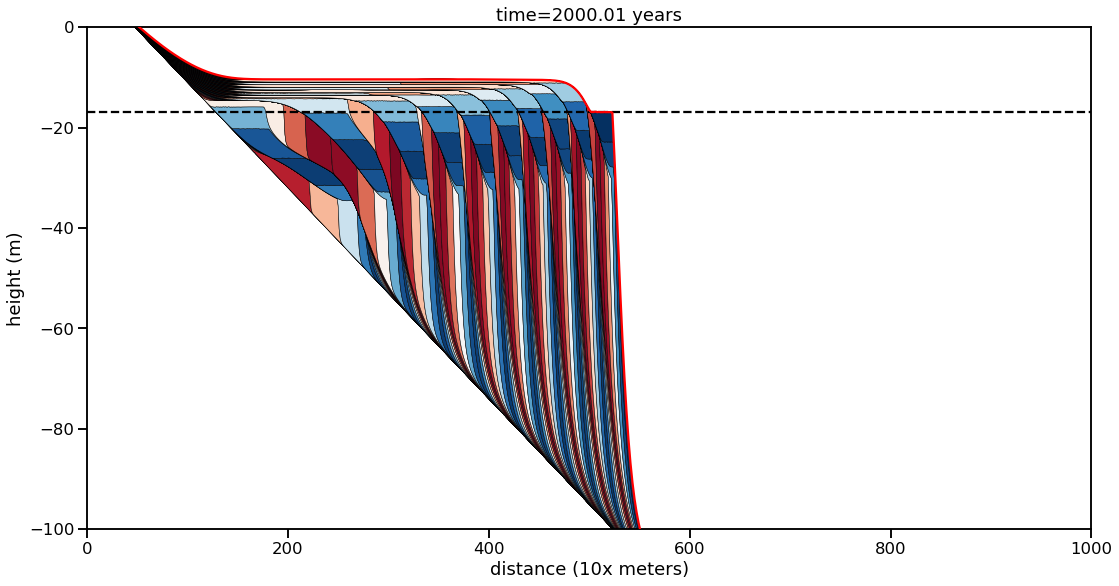

In [10]:
animate_beds(beds=beds,otime=otime,rsl=rsl,aspect=5, ymin=-100)


## For next Monday, please come prepared to discuss and work our way through the posted reading (Kenyon and Turcotte, 1985)

## Solving the diffusion equation numerically
We can use the diffusion equation to simulate more complicated transport than the specific case from *Kenyon and Turcott 1985*. Generally, after defining a few properties of the system <span style='color:DodgerBlue'>**(What properties?)**</span> we can solve how that system will change over time. However, there is no exact, or **analytical** form to this solution -- we must solve the equation by numerical approximation.
<center></center>
$$\begin{equation}
\dfrac{\partial h}{\partial t}
= 
K \dfrac{\partial^2 h}{\partial x^2}
\end{equation}$$

<center>
    <div style='height:40vh;'>
	    <p>
    </div>
</center>

<span style='color:DodgerBlue'>**(initial topography, boundary conditions at the edges)**</span>

### The Derivative Function
Recall: what is the definition of the derivative function $f'(x)$?

$$
\begin{equation}
f'(x)
=
\lim_{\Delta x\to0}
\dfrac{f(x+\Delta x)-f(x)}{\Delta x}
\end{equation}
=
\dfrac{\Delta f}{\Delta x}
$$


<center>
    <div style='height:40vh;'>
	    <p>
    </div>
</center>

<span style='color:DodgerBlue'>**While we can't calculate $\Delta x$ and $\Delta f$ for $\lim{(\Delta x\to0)}$ CPUs have no trouble calculating $\dfrac{\Delta f}{\Delta x}$ for a sufficiently small value of $\Delta x$**</span>

### Finite difference methods
In fact, we have many possible approaches to estimating derivatives using *sufficiently small* values of $\Delta x$, and these methods are collectively known as **finite difference methods**. These methods make use of <span style='color:DodgerBlue'>**Taylor's theorem**</span>:

$\begin{equation} f(x + \Delta x) = f(x) + \dfrac{f'(x)}{1!}(\Delta x) + \dfrac{f''(x)}{2!}(\Delta x)^2 + ... \end{equation} \label{eq:taylor}\tag{Taylor series} $  

<span style='color:DodgerBlue'>**What happens to the size of each higher order term in the series?**</span>

In [1]:
from scipy.linalg import solve_banded
from scipy.interpolate import interp1d
import numpy as np
from tqdm.notebook import tqdm
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import matplotlib.cm as cm
import time


%matplotlib inline

class Diffuse1D:
    def __init__(self, length, spacing, tstep, left, right, K):
        self.x = np.arange(0, length, spacing)
        self.u = (
            left - self.x * (left - right) / length
        )  # sets initial to steady state solution
        
        self.u = (
            left - self.x * (left - right) / length
        )  # sets initial to steady state solution
        #         self.u = np.zeros(self.x.shape)+right
        N = self.x.size
        self.tstep = tstep
        self.spacing = spacing
        self.K = K
        k_arr = K * np.ones((N))  # m^2/yr
        self.r = k_arr * (self.tstep / (2 * spacing ** 2))  ##Fourier number
        self.time = 0
        self.base_level_fun = interp1d([0, 1], [0, 0], bounds_error=False, fill_value=0)
        self.base_level = self.base_level_fun(self.time)
        self.sed_Q = 100 / spacing  # not sure if spacing is correct here
        self.subsidence_r = 0.025 * 1e-3 * 1e1  # not in use yet
        self.left = left
        self.right = right

        # initialize matrices A, B and b array
        self.A = np.zeros((N, N))
        self.B = np.zeros((N, N))
        self.b = np.zeros((N))
        # define matrices A, B and b array  ##THIS STEP IS SLOW -- but only called once
        # see method update_K() for fast version
        for i in range(N):
            if i == 0:  # first
                self.A[i, :] = [
                    1 + 2 * self.r[j] if j == 0 else (-self.r[j]) if j == 1 else 0
                    for j in range(N)
                ]
                self.B[i, :] = [
                    1 - 2 * self.r[j] if j == 0 else self.r[j] if j == 1 else 0
                    for j in range(N)
                ]
                self.b[i] = left  # boundary condition at i=1
            elif i == N - 1:  # last
                self.A[i, :] = [
                    -self.r[j] if j == N - 2 else 1 + 2 * self.r[j] if j == N - 1 else 0
                    for j in range(N)
                ]
                self.B[i, :] = [
                    self.r[j] if j == N - 2 else 1 - 2 * self.r[j] if j == N - 1 else 0
                    for j in range(N)
                ]
                self.b[i] =  right  # boundary condition at i=N
            else:  # middles
                self.A[i, :] = [
                    -self.r[j]
                    if j == i - 1 or j == i + 1
                    else 1 + 2 * self.r[j]
                    if j == i
                    else 0
                    for j in range(N)
                ]
                self.B[i, :] = [
                    self.r[j]
                    if j == i - 1 or j == i + 1
                    else 1 - 2 * self.r[j]
                    if j == i
                    else 0
                    for j in range(N)
                ]

        #von nuemann bottom
#         self.A[-1,-1] = 1+self.r[-1]
#         self.B[-1,-1] = 1-self.r[-1]
#         self.b[-1]=0
        
        self.Ab = np.zeros((3, N))
        self.Ab[0, 1:] = np.diag(self.A, -1)
        self.Ab[1, :] = np.diag(self.A)
        self.Ab[2, :-1] = np.diag(self.A, 1)
        self.Q = np.zeros((N))
        self.bb = self.B.dot(self.u) + 2 * self.r*self.b + self.tstep*self.Q

        self.update_coastline()

    def set_baselevel(self, time, rsl):
        # can pass a set of paired time/rsl and model will interpolate for each dt
        self.base_level_fun = interp1d(time, rsl)

    def run_step(self):
        #self.update_K()  # can disable if K is not changing with each t_step (ie as a function of elevation)
        self.Q *= 0  # clearing any old sed flux terms
        self.base_level = self.base_level_fun(self.time)  # update base level
        self.update_coastline()  # select coastline point for sed flux
        self.Q[self.coastline] += self.sed_Q  # add sediment to the coastline
        self.bb = self.B.dot(self.u) + 2 * self.r*self.b + self.tstep*self.Q  # quick matrix addition
        self.u = solve_banded(
            (1, 1), self.Ab, self.bb
        )  # this step solves the Crank-Nicholson matrix for next timestep
        self.time += self.tstep  # increment timestep

    def set_left(self, left):
        # function to change boundary condition
        self.b[0] = left

    def set_u(self, u):
        self.u = u

    def set_right(self, right):
        # function to change boundary condition
        self.b[-1] = right

    def update_coastline(self):
        # finds the first grid point below base level starting on the left hand side
        try:
            self.coastline = np.where(self.u < (self.base_level))[0][0]
        except:
            self.coastline = 0

    def update_K(self):
        # updates K if you need it to change with each timestep
        # the tridiagonal matrix forms below dont need to be inverted, so this is
        # a much faster form of setting up the Crank-Nicolson solution
        k_arr = self.K * np.ones((self.x.size))
        k_arr[: self.coastline] = 1e-2
#         swb = np.where(self.u < (self.base_level - 25))[0][0] #lower K below SWB?
#         k_arr[swb:] = 1e-2
        self.r = k_arr * (self.tstep / (2 * self.spacing ** 2))  ##Fourier number
        np.fill_diagonal(self.B, 1 - 2 * self.r)
        np.fill_diagonal(self.B[1:], self.r[1:])
        np.fill_diagonal(self.B[:, 1:], self.r[:-1])
        self.Ab[0, 1:] = -1 * self.r[:-1]
        self.Ab[1, :] = 1 + 2 * self.r
        self.Ab[2, :-1] = -1 * self.r[1:]
        
        #should the R_i match??  go back a few steps and check the full form
        
        #von nuemann bottom
#         self.Ab[1, -1] = 1+self.r[-1]
#         self.B[-1,-1] = 1-self.r[-1]
#         self.b[-1]=0
#         self.b[0] = self.left
#         self.b[-1] = self.right

def animate_beds(beds,otime,rsl, color=True, aspect=10, ymin=-55):
    N = int(len(beds) / 2) + 1
    cs_reg = sns.color_palette("viridis", n_colors=np.sum(np.gradient(rsl) <= 0))
    cs_trans = sns.color_palette("Greys", n_colors=np.sum(np.gradient(rsl) > 0))
    rsl_down = np.gradient(rsl) <= 0
    if color==False:
        cs_reg = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) <= 0))
        cs_trans = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) > 0))

    sns.set_palette("tab20", n_colors=40)
    
    minima = min(np.gradient(rsl))
    maxima = max(np.gradient(rsl))
    max_max = max([minima,maxima])

    norm = matplotlib.colors.Normalize(vmin=-1*max_max, vmax=max_max, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)

    # for k in range(len(beds)):
    #         beds[k]-=otime[k]*model.subsidence_r

    beds = np.array(beds)
    for i, bed in enumerate(beds):

        beds_eroded = []

        for k, layer in enumerate(beds[:i]):
            future_min = np.min(beds[k : i + 1], axis=0)
            beds_eroded.append(future_min)
        #         beds_eroded.append(layer)

        beds_eroded.append(beds[i])
        beds_eroded = np.array(beds_eroded)

        fig = plt.figure(figsize=(18, 12))
        clear_output(wait=True)
        c = [0, 0]
        z = N + 1
        last_layer = beds_eroded[0]
        for layer, down in zip(beds_eroded[: i + 1], np.gradient(rsl)):
            if down:
                plt.fill_between(
                    np.arange(layer.size),
                    last_layer,
                    layer,
                    facecolor=mapper.to_rgba(down),
                    lw=0.5,
                    edgecolor=(0, 0, 0),
                )
                c[0] += 1
            else:
                plt.fill_between(
                    np.arange(layer.size),
                    last_layer,
                    layer,
                    facecolor=cs_trans[c[1]],
                    lw=0.1,
                    edgecolor=(0, 0, 0),
                )
                c[1] += 1
            z -= 1
            last_layer = np.copy(layer)

        plt.plot(bed, color="r", zorder=N * 2 + 1)
        plt.plot([0, 1000], [rsl[i], rsl[i]], "--", color="k")

        plt.gca().set_xlim([0, layer.size])
        plt.gca().set_ylim([ymin, 0])
        plt.gca().set_aspect(aspect)
        #     plt.gca().set_title('Regression (color) and Transgression (greyscale)\n with Constant Sed Flux (vertical exaggeration: 100)')
        plt.gca().set_title("time=" + str(np.round(otime[i], 2)) + " years")
        plt.gca().set_ylabel("height (m)")
        plt.gca().set_xlabel("distance (10x meters)")
        plt.show()
        time.sleep(0.01)

In [2]:
dt = .01
total_time = 2000
base_level_rise=5

model = Diffuse1D(length=10000, spacing=10, tstep=dt, left=10, right=-200, K=1e2)
xt = np.linspace(0, 10000, 10000)

model.set_baselevel(xt, -10 * np.sin(xt * 3e-2) + base_level_rise / (total_time) * xt - 25)

beds = []
otime = []
rsl = []
# plt.plot(model.u)

beds.append(model.u)
otime.append(model.time)
rsl.append(model.base_level)


pbar = tqdm(range(int(total_time / dt)+1))
for k in pbar:
    model.run_step()
    #     model.set_left(model.base_level+10)
    if k % 2000 == 0:
        pbar.set_description("Processing year %s" % np.round(model.time, 1))
        beds.append(model.u)
        otime.append(model.time)
        rsl.append(model.base_level)

  0%|          | 0/200001 [00:00<?, ?it/s]

In [ ]:
x_ran = np.linspace(0,total_time,len(pbar))
plt.plot(x_ran,model.base_level_fun(x_ran))
plt.gca().set_xlabel('Time (years)')
plt.gca().set_ylabel('Base level')

In [ ]:
animate_beds(beds=beds,otime=otime,rsl=rsl,aspect=5, ymin=-100)